<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(2_4)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_2.4'

In [4]:
os.listdir(base_path)

['data_multi_delta_2.4_n250.csv',
 'data_multi_delta_2.4_n120.csv',
 'data_multi_delta_2.4_n60.csv',
 'data_multi_delta_2.4_n30.csv',
 'data_multi_delta_2.4_n20.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_2.4_n60.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,41.219105,216.877913,170.192672,46.685241
1,0.0,1.0,86.165717,56.959442,56.713429,36.600889,246.439477,227.963860,18.475617
2,0.0,2.0,82.871910,67.183861,68.394119,205.069368,433.519258,250.859842,182.659416
3,0.0,3.0,60.173628,73.828076,88.180822,54.831998,287.014523,249.086947,37.927576
4,0.0,4.0,35.709130,85.695082,80.454669,-352.384373,-140.525492,226.603665,-367.129157
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,141.012487,403.695675,280.034928,123.660746
59996,999.0,56.0,36.953943,85.309647,24.003992,-71.999887,84.267695,172.287709,-88.020014
59997,999.0,57.0,64.419649,76.774011,25.100978,41.813479,218.108116,159.212922,58.895194
59998,999.0,58.0,90.553946,37.505438,62.282147,6.371484,206.713014,197.120280,9.592735


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,41.219105,216.877913,170.192672,46.685241
1,0.0,1.0,86.165717,56.959442,56.713429,36.600889,246.439477,227.963860,18.475617
2,0.0,2.0,82.871910,67.183861,68.394119,205.069368,433.519258,250.859842,182.659416
3,0.0,3.0,60.173628,73.828076,88.180822,54.831998,287.014523,249.086947,37.927576
4,0.0,4.0,35.709130,85.695082,80.454669,-352.384373,-140.525492,226.603665,-367.129157
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,141.012487,403.695675,280.034928,123.660746
59996,999.0,56.0,36.953943,85.309647,24.003992,-71.999887,84.267695,172.287709,-88.020014
59997,999.0,57.0,64.419649,76.774011,25.100978,41.813479,218.108116,159.212922,58.895194
59998,999.0,58.0,90.553946,37.505438,62.282147,6.371484,206.713014,197.120280,9.592735


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    51.042187  40.567865  ...  170.192672   46.685241
      1.0    86.165717  56.959442  ...  227.963860   18.475617
      2.0    82.871910  67.183861  ...  250.859842  182.659416
      3.0    60.173628  73.828076  ...  249.086947   37.927576
      4.0    35.709130  85.695082  ...  226.603665 -367.129157
...                ...        ...  ...         ...         ...
999.0 55.0   81.638297  88.645565  ...  280.034928  123.660746
      56.0   36.953943  85.309647  ...  172.287709  -88.020014
      57.0   64.419649  76.774011  ...  159.212922   58.895194
      58.0   90.553946  37.505438  ...  197.120280    9.592735
      59.0   20.879664  91.183392  ...  219.995406   21.873790

[60000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    51.042187  40.567865  ...  170.192672   46.685241
      1.0    86.165717  56.959442  ...  227.963860   18.475617
      2.0    82.871910  67.183861  ...  250.859842  182.659416
      3.0    60.173628  73.828076  ...  249.086947   37.927576
      4.0    35.709130  85.695082  ...  226.603665 -367.129157
...                ...        ...  ...         ...         ...
999.0 55.0   81.638297  88.645565  ...  280.034928  123.660746
      56.0   36.953943  85.309647  ...  172.287709  -88.020014
      57.0   64.419649  76.774011  ...  159.212922   58.895194
      58.0   90.553946  37.505438  ...  197.120280    9.592735
      59.0   20.879664  91.183392  ...  219.995406   21.873790

[60000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.042187,40.567865,74.048756,41.219105,216.877913,170.192672,46.685241
1,0.0,1.0,86.165717,56.959442,56.713429,36.600889,246.439477,227.963860,18.475617
2,0.0,2.0,82.871910,67.183861,68.394119,205.069368,433.519258,250.859842,182.659416
3,0.0,3.0,60.173628,73.828076,88.180822,54.831998,287.014523,249.086947,37.927576
4,0.0,4.0,35.709130,85.695082,80.454669,-352.384373,-140.525492,226.603665,-367.129157
...,...,...,...,...,...,...,...,...,...
59995,999.0,55.0,81.638297,88.645565,82.399326,141.012487,403.695675,280.034928,123.660746
59996,999.0,56.0,36.953943,85.309647,24.003992,-71.999887,84.267695,172.287709,-88.020014
59997,999.0,57.0,64.419649,76.774011,25.100978,41.813479,218.108116,159.212922,58.895194
59998,999.0,58.0,90.553946,37.505438,62.282147,6.371484,206.713014,197.120280,9.592735


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat       e_hat
rep   index                        ...                        
0.0   0.0    51.042187  40.567865  ...  170.192672   46.685241
      1.0    86.165717  56.959442  ...  227.963860   18.475617
      2.0    82.871910  67.183861  ...  250.859842  182.659416
      3.0    60.173628  73.828076  ...  249.086947   37.927576
      4.0    35.709130  85.695082  ...  226.603665 -367.129157
...                ...        ...  ...         ...         ...
999.0 55.0   81.638297  88.645565  ...  280.034928  123.660746
      56.0   36.953943  85.309647  ...  172.287709  -88.020014
      57.0   64.419649  76.774011  ...  159.212922   58.895194
      58.0   90.553946  37.505438  ...  197.120280    9.592735
      59.0   20.879664  91.183392  ...  219.995406   21.873790

[60000 rows x 7 columns]

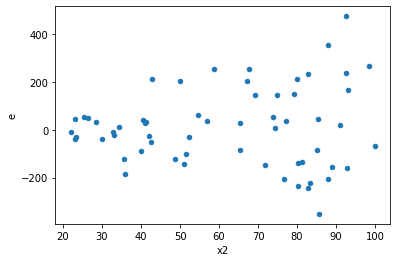

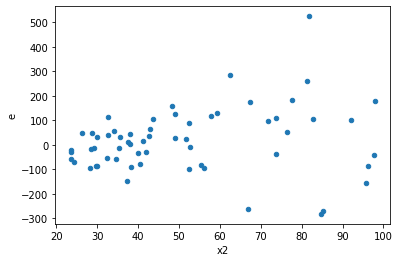

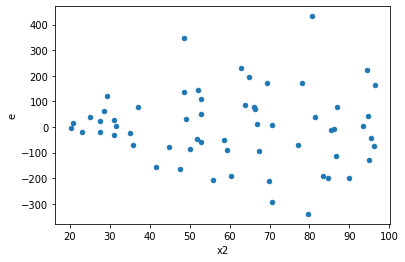

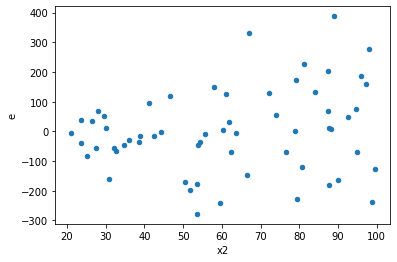

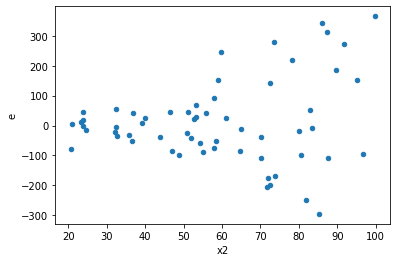

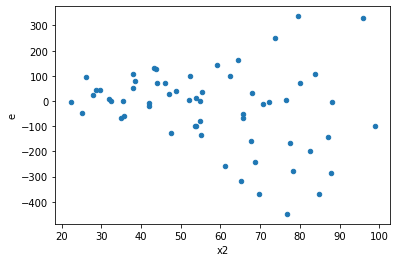

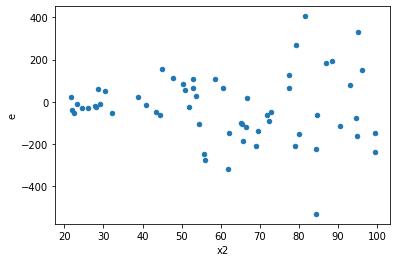

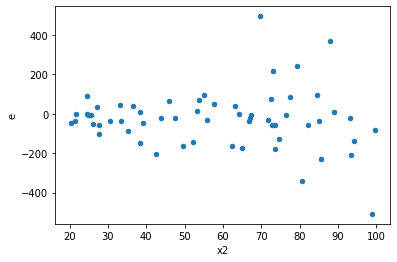

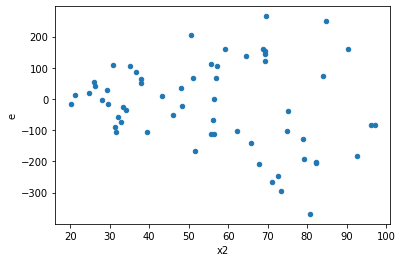

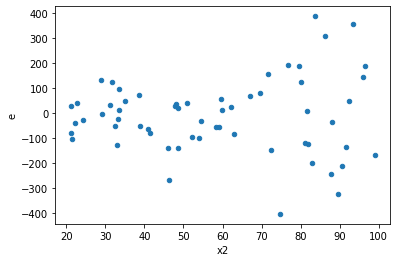

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,
0.0,21.0,21.0,1044657.1205510657,198928.21525766014,52232.85602755328,9946.410762883006,5.251427602655471,0.00035664458420159306,0.9998216777078992,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,759485.8044853014,89297.5776255914,37974.29022426507,4464.87888127957,8.50511094119135,7.475478542184888e-06,0.9999962622607289,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,703305.0699260334,252236.347598337,35165.253496301666,12611.817379916849,2.788278044074685,0.02294953312750181,0.9885252334362491,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,545839.6622238613,162521.1537965533,27291.983111193065,8126.057689827665,3.358576095928734,0.007665835721490488,0.9961670821392548,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,762466.3418376882,39893.669008767596,38123.31709188441,1994.6834504383799,19.11246472893024,4.781129048225807e-09,0.9999999976094355,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,683349.0207013906,80184.91059599358,34167.45103506953,4009.2455297996794,8.52216477666727,7.3492593257729055e-06,0.9999963253703371,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,899013.2906909734,61470.798025531934,44950.66453454867,3073.5399012765965,14.625046681801134,5.9466604751534646e-08,0.9999999702666976,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,761954.4638480817,100838.99732364452,38097.72319240408,5041.949866182226,7.556148752675272,2.0173094545494763e-05,0.9999899134527273,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,713003.9995888948,62926.18257074367,35650.19997944474,3146.309128537184,11.330800160764756,6.10044760263051e-07,0.9999996949776199,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,21.0,21.0,1044657.1205510657,198928.21525766014,52232.85602755328,9946.410762883006,5.251427602655471,0.00035664458420159306,Reject001=0 : Heteroscedasticity
1.0,21.0,21.0,759485.8044853014,89297.5776255914,37974.29022426507,4464.87888127957,8.50511094119135,7.475478542184888e-06,Reject001=0 : Heteroscedasticity
2.0,21.0,21.0,703305.0699260334,252236.347598337,35165.253496301666,12611.817379916849,2.788278044074685,0.02294953312750181,Reject001=1 : Homoscedasticity
3.0,21.0,21.0,545839.6622238613,162521.1537965533,27291.983111193065,8126.057689827665,3.358576095928734,0.007665835721490488,Reject001=0 : Heteroscedasticity
4.0,21.0,21.0,762466.3418376882,39893.669008767596,38123.31709188441,1994.6834504383799,19.11246472893024,4.781129048225807e-09,Reject001=0 : Heteroscedasticity
5.0,21.0,21.0,683349.0207013906,80184.91059599358,34167.45103506953,4009.2455297996794,8.52216477666727,7.3492593257729055e-06,Reject001=0 : Heteroscedasticity
6.0,21.0,21.0,899013.2906909734,61470.798025531934,44950.66453454867,3073.5399012765965,14.625046681801134,5.9466604751534646e-08,Reject001=0 : Heteroscedasticity
7.0,21.0,21.0,761954.4638480817,100838.99732364452,38097.72319240408,5041.949866182226,7.556148752675272,2.0173094545494763e-05,Reject001=0 : Heteroscedasticity
8.0,21.0,21.0,713003.9995888948,62926.18257074367,35650.19997944474,3146.309128537184,11.330800160764756,6.10044760263051e-07,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    921
Reject001=1 : Homoscedasticity       79
Name: Result_test, dtype: int64